In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np
import statsmodels.api as sm

In [2]:
cars=pd.read_csv("C:\\ExcelR\\Assignments\\Assignment 5\\ToyotaCorolla.csv")

In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [4]:
cars.drop(cars.iloc[:,19:39],inplace=True,axis=1)

In [5]:
cars_new=cars.drop(['Id','Model','Mfg_Month','Mfg_Year','Fuel_Type','Fuel_Type','Met_Color','Color','Automatic','Cylinders','Mfr_Guarantee'],axis=1)

In [6]:
cars_new.rename(columns={'Age_08_04':'AGE','cc':'CC','Doors':'doors','Gears':'gears','Quarterly_Tax':'QTAX'},inplace=True)

In [7]:
cars_new.head(5)

,Price,AGE,KM,HP,CC,doors,gears,QTAX,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [8]:
cars_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Price   1436 non-null   int64
 1   AGE     1436 non-null   int64
 2   KM      1436 non-null   int64
 3   HP      1436 non-null   int64
 4   CC      1436 non-null   int64
 5   doors   1436 non-null   int64
 6   gears   1436 non-null   int64
 7   QTAX    1436 non-null   int64
 8   Weight  1436 non-null   int64
dtypes: int64(9)
memory usage: 101.1 KB


In [9]:
cars_new.describe()

,Price,AGE,KM,HP,CC,doors,gears,QTAX,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


correlation matrix

In [10]:
cars_new.corr()

,Price,AGE,KM,HP,CC,doors,gears,QTAX,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
AGE,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
CC,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QTAX,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


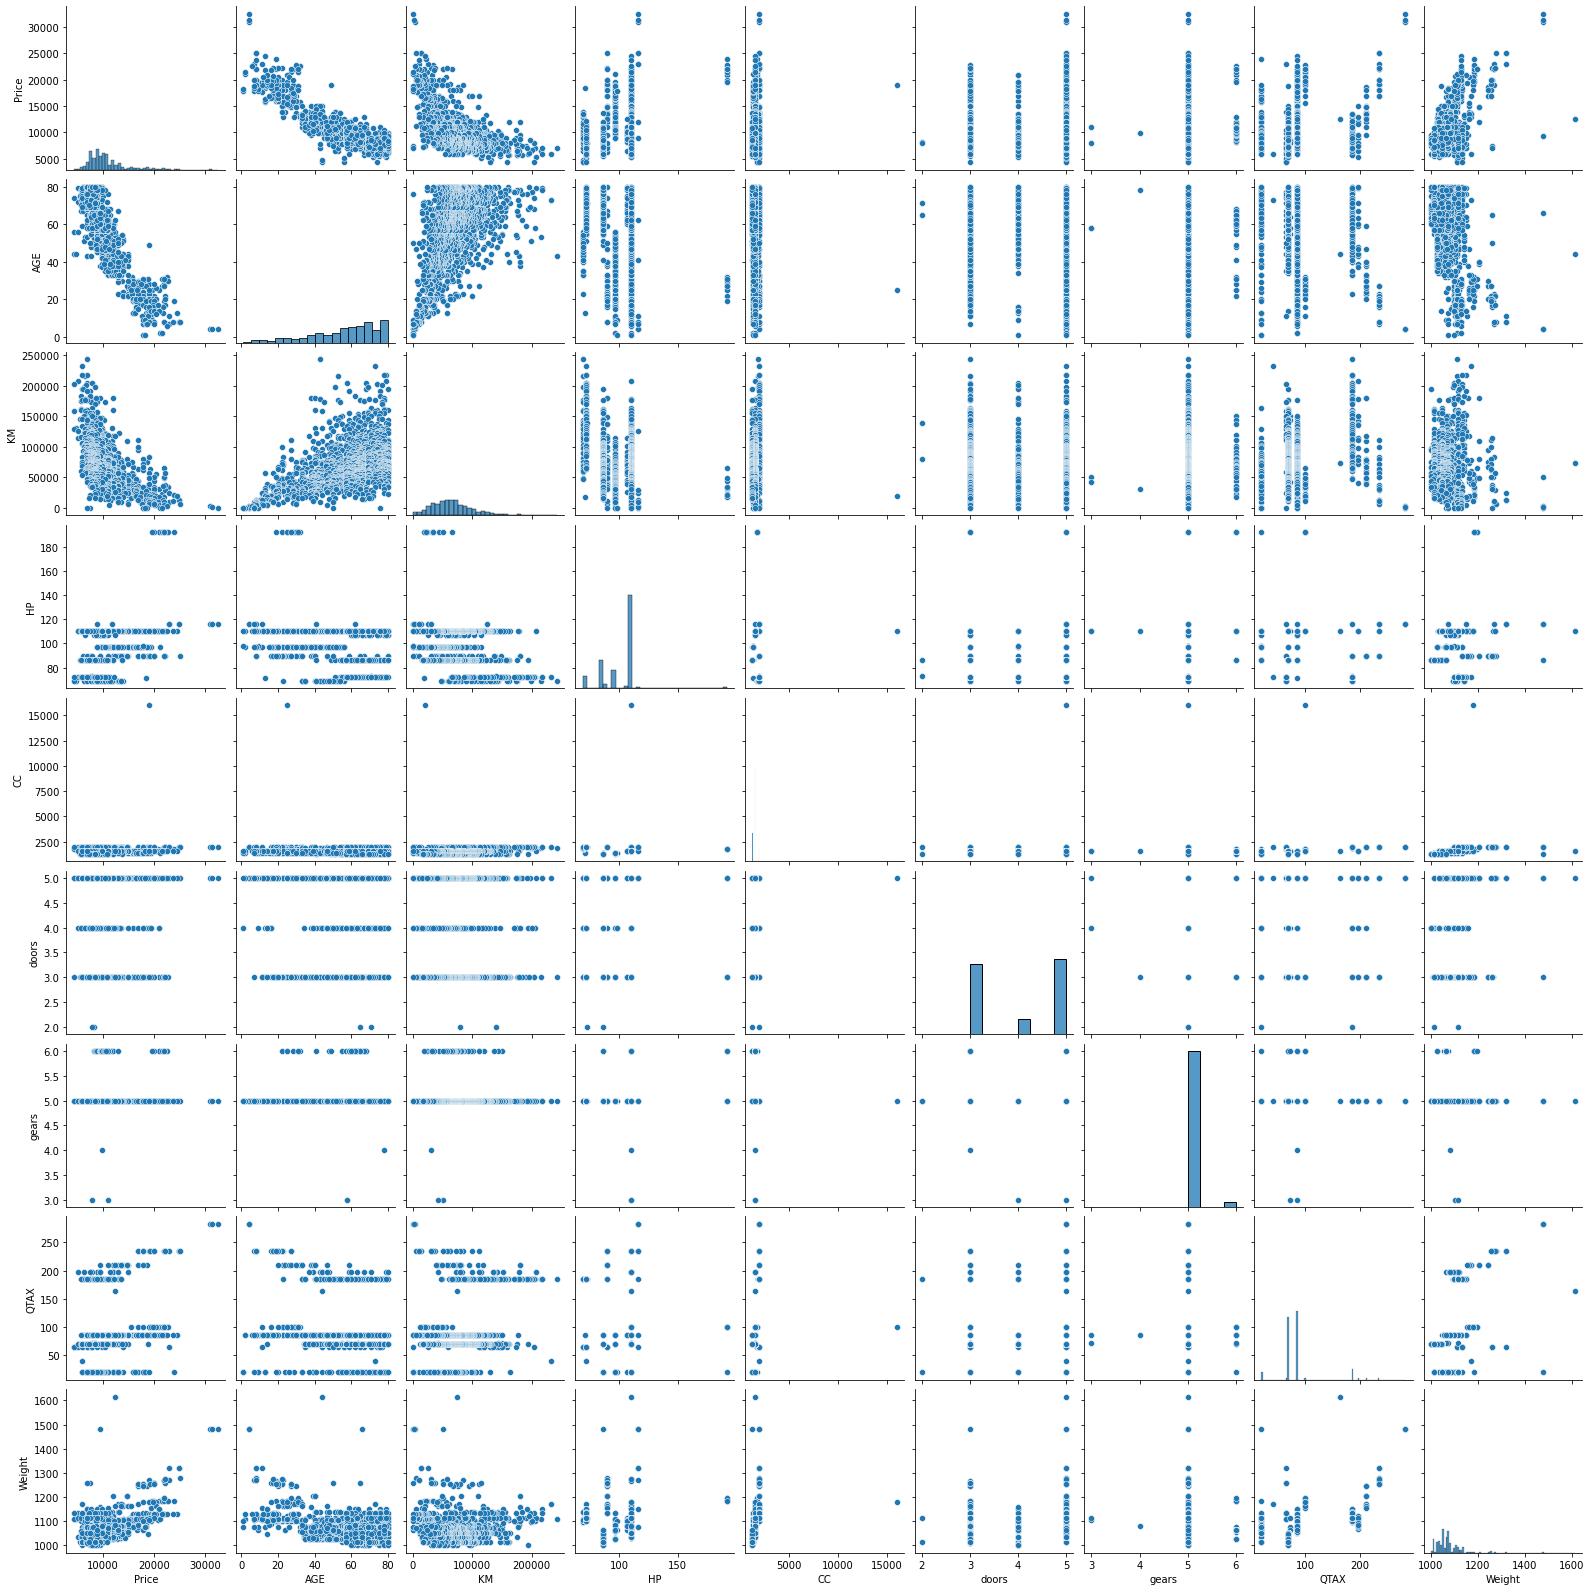

In [11]:
# scatte plots
sns.pairplot(cars_new)

# Model

In [12]:
model=smf.ols('Price~AGE+KM+HP+CC+doors+gears+QTAX+Weight',data=cars_new).fit()

In [13]:
# model parameters
model.params

Intercept   -5573.106358
AGE          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
doors          -1.616641
gears         594.319936
QTAX            3.949081
Weight         16.958632
dtype: float64

In [14]:
# t-value and p-value for model
print(model.tvalues, '\n', model.pvalues)

Intercept    -3.948666
AGE         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
doors        -0.040410
gears         3.016007
QTAX          3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
AGE          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
doors         9.677716e-01
gears         2.606549e-03
QTAX          2.619148e-03
Weight        2.048576e-52
dtype: float64


In [15]:
print('R^2:',np.round(model.rsquared,5),'   ','R^2_adj:',np.round(model.rsquared_adj,6))

R^2: 0.86376     R^2_adj: 0.862999


Linear Regression for individual insignificant regressor

In [16]:
model_C=smf.ols('Price~CC',data=cars_new).fit()
print(model_C.tvalues,'\n',model_C.pvalues)

Intercept    24.694090
CC            4.824822
dtype: float64 
 Intercept    1.766912e-112
CC            1.550808e-06
dtype: float64


In [17]:
model_D=smf.ols('Price~doors',data=cars_new).fit()
print(model_D.tvalues,'\n',model_D.pvalues)

Intercept    19.258097
doors         7.141657
dtype: float64 
 Intercept    1.094732e-73
doors        1.461237e-12
dtype: float64


In [18]:
model_DC=smf.ols('Price~doors+CC',data=cars_new).fit()
print(model_DC.tvalues,'\n',model_DC.pvalues)

Intercept    12.620704
doors         6.816153
CC            4.340400
dtype: float64 
 Intercept    1.056885e-34
doors        1.373469e-11
CC           1.521992e-05
dtype: float64


here both CC and doors regressor ar significant when perform seprate and together. for that we will use VIF score

In [19]:
rsq_A=smf.ols('AGE~KM+CC+HP+doors+gears+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_A = 1/(1-rsq_A)

rsq_K=smf.ols('KM~AGE+CC+HP+doors+gears+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_K=1/(1-rsq_K)

rsq_C=smf.ols('CC~KM+AGE+HP+doors+gears+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_C=1/(1-rsq_C)

rsq_H= smf.ols('HP~KM+CC+AGE+doors+gears+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_H=1/(1-rsq_H)

rsq_D=smf.ols('doors~AGE+CC+HP+KM+gears+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_D=1/(1-rsq_D)

rsq_G=smf.ols('gears~KM+AGE+HP+doors+CC+QTAX+Weight',data=cars_new).fit().rsquared  
VIF_G=1/(1-rsq_G)

rsq_Q=smf.ols('QTAX~KM+CC+AGE+doors+gears+HP+Weight',data=cars_new).fit().rsquared  
VIF_Q=1/(1-rsq_Q)

rsq_W=smf.ols('Weight~KM+CC+AGE+doors+gears+QTAX+HP',data=cars_new).fit().rsquared  
VIF_W=1/(1-rsq_W)

In [20]:
data={'Rgresspr':['AGE','KM','CC','HP','Doors','Gears','QTax','Weight'],'VIF':[VIF_A,VIF_K,VIF_C,VIF_H,VIF_D,VIF_G,VIF_Q,VIF_W]}
VIF=pd.DataFrame(data)
VIF

,Rgresspr,VIF
0,AGE,1.884620
1,KM,1.756905
2,CC,1.163894
3,HP,1.419422
4,Doors,1.156575
5,Gears,1.098723
6,QTax,2.311431
7,Weight,2.516420


Here None of the regressor has VIF score greater than 20. Therefore we will keep all regressor irrespective of there pvalues

# Residual Analysis

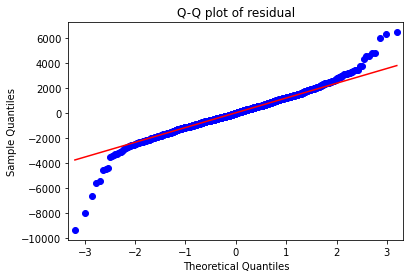

In [21]:
# QQ plot
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Q-Q plot of residual")
plt.show()

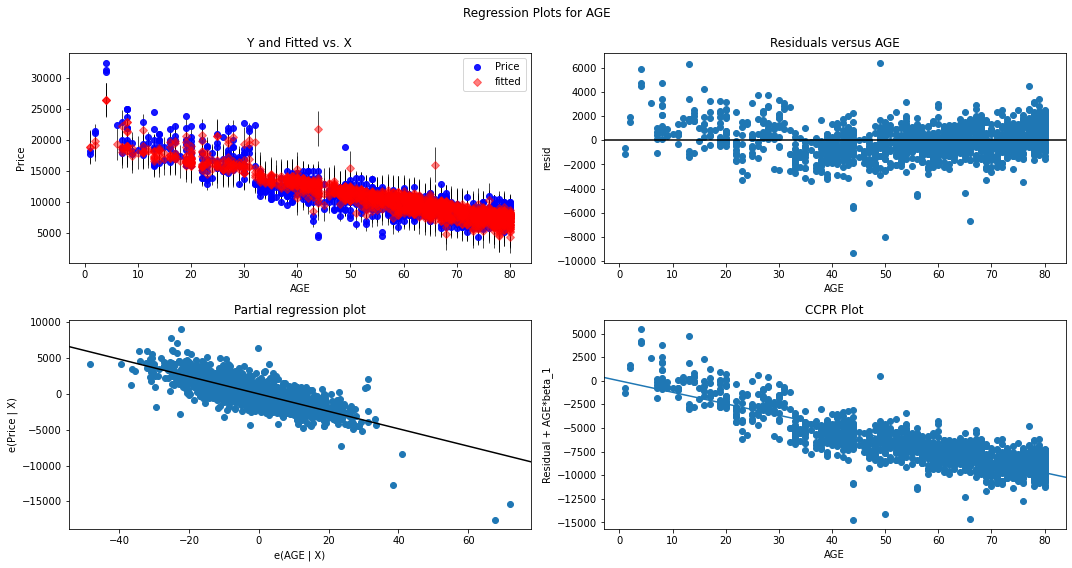

In [22]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "AGE", fig=fig)
plt.show()

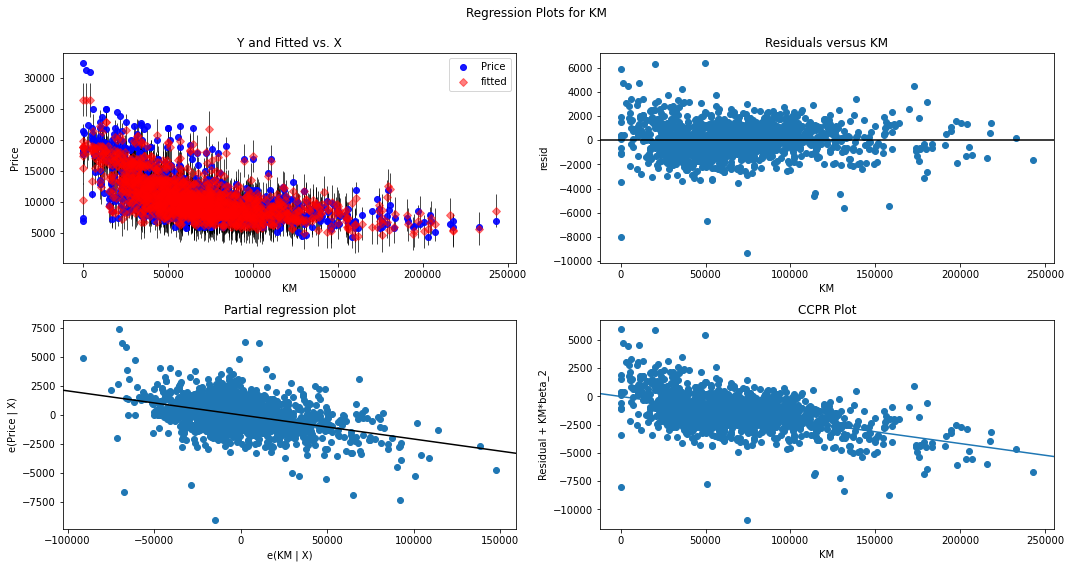

In [23]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "KM", fig=fig)
plt.show()

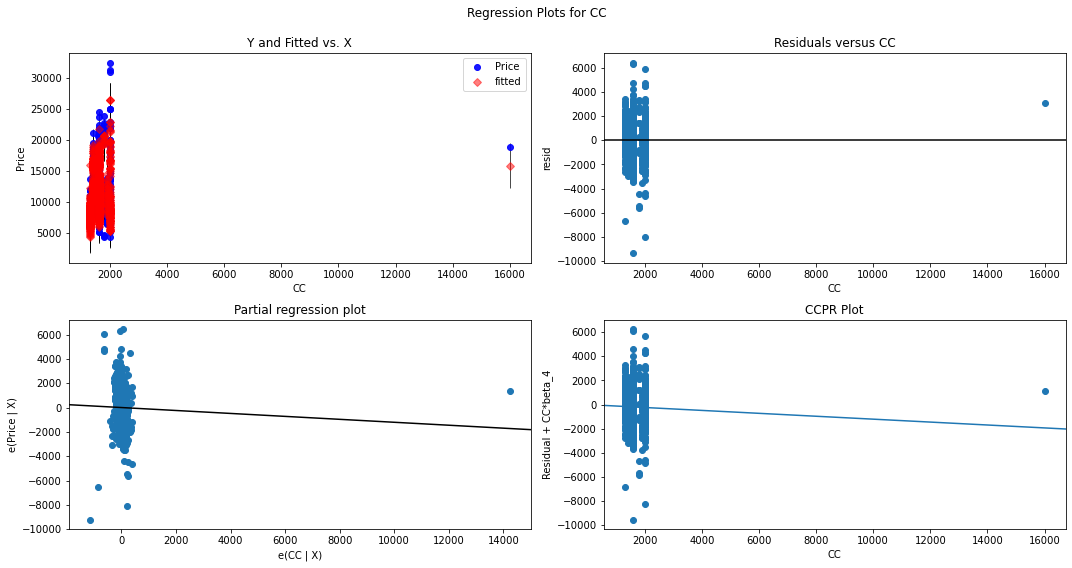

In [24]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "CC", fig=fig)
plt.show()

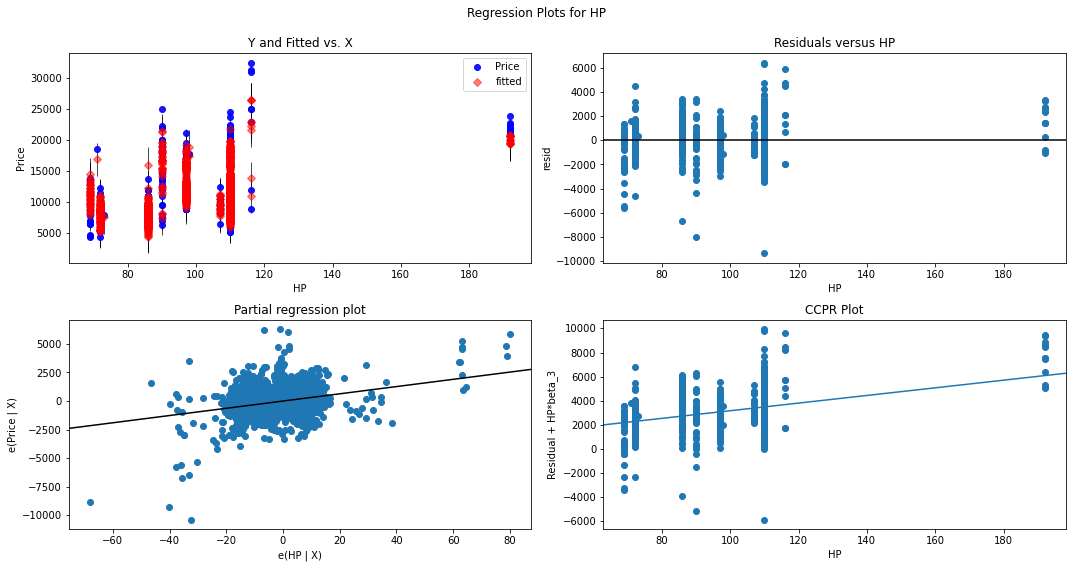

In [25]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "HP", fig=fig)
plt.show()

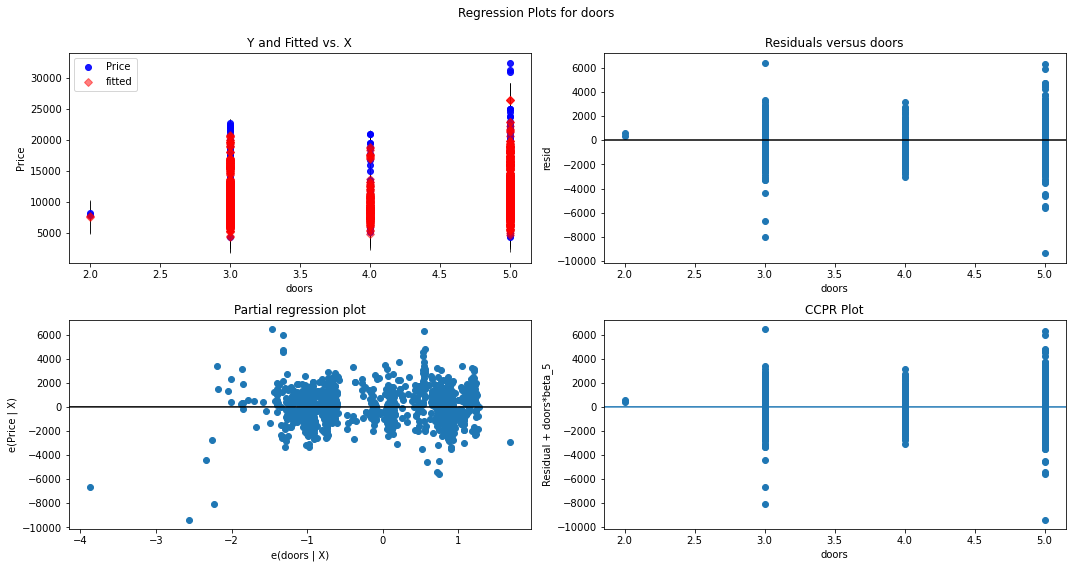

In [26]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "doors", fig=fig)
plt.show()

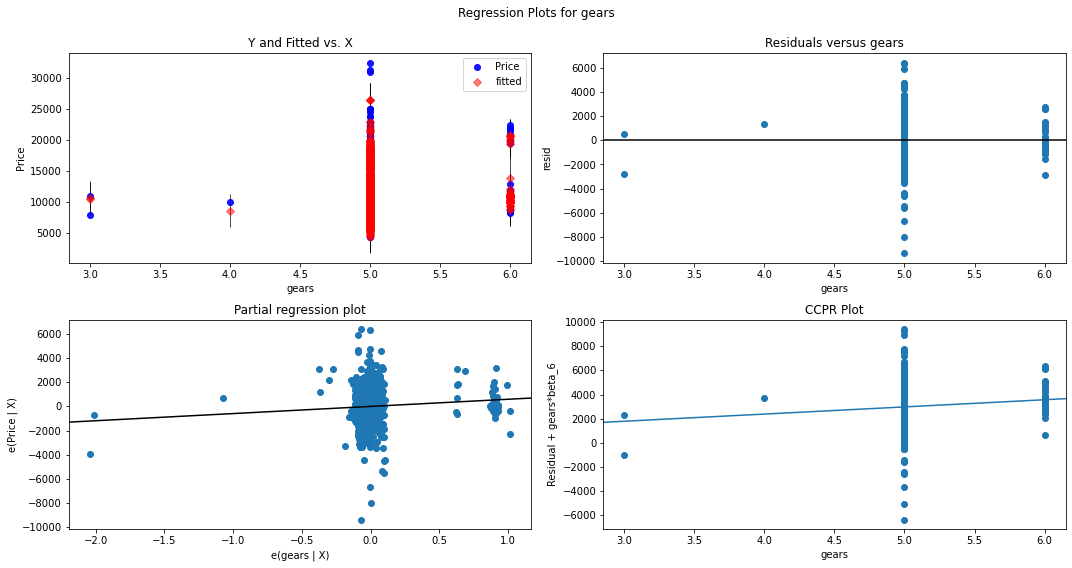

In [27]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "gears", fig=fig)
plt.show()

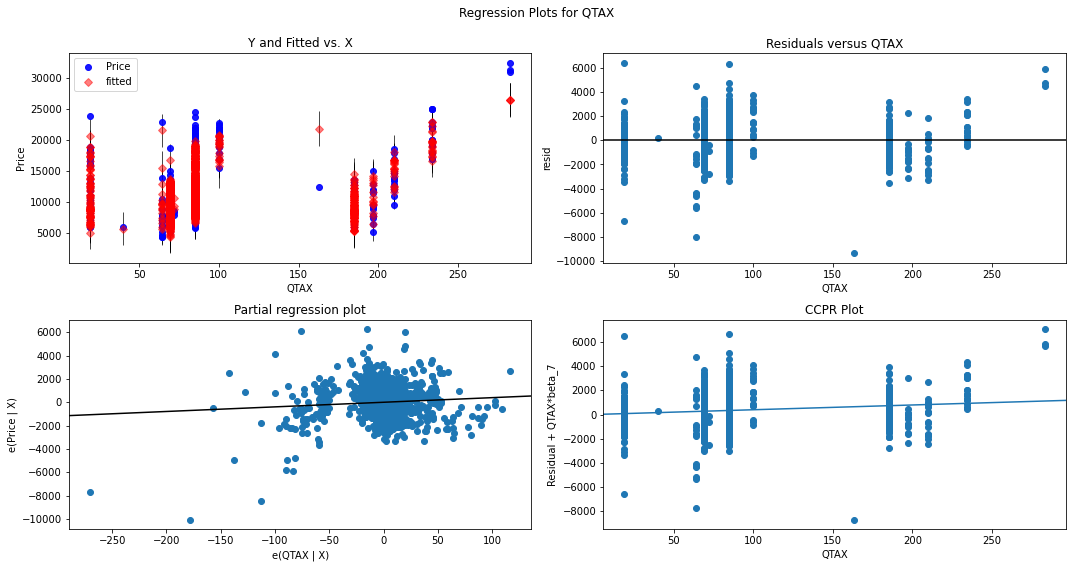

In [28]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "QTAX", fig=fig)
plt.show()

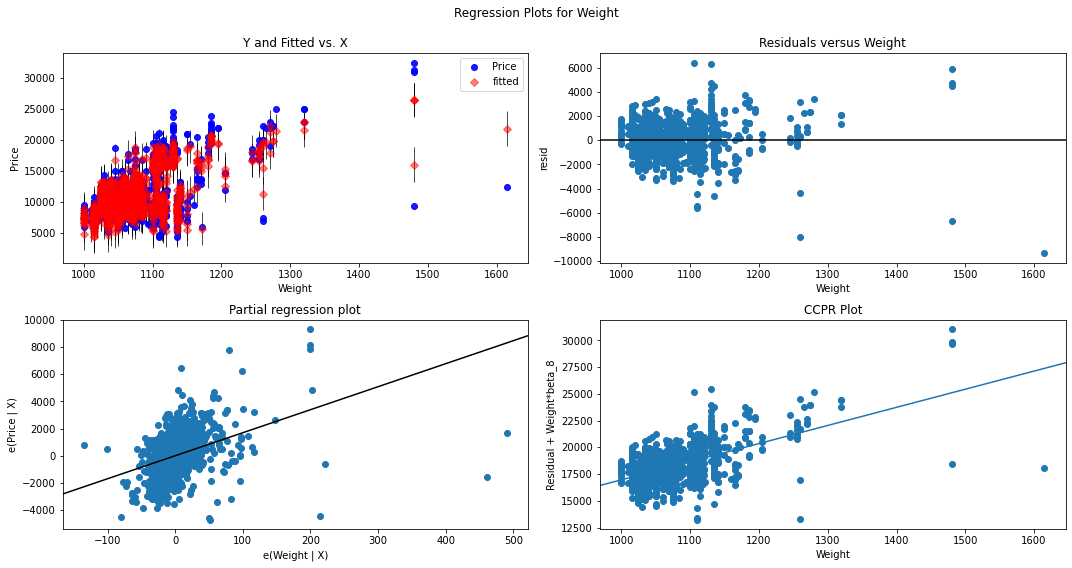

In [29]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Weight", fig=fig)
plt.show()

# Final model

In [30]:
model_f=smf.ols('Price~AGE+KM+HP+CC+doors+gears+QTAX+Weight',data=cars_new).fit()

In [31]:
# Model parameters
model_f.params

Intercept   -5573.106358
AGE          -121.658402
KM             -0.020817
HP             31.680906
CC             -0.121100
doors          -1.616641
gears         594.319936
QTAX            3.949081
Weight         16.958632
dtype: float64

In [32]:
print(model.tvalues, '\n', model.pvalues)
print('R^2:',np.round(model.rsquared,5),'   ','R^2_adj:',np.round(model.rsquared_adj,6))

Intercept    -3.948666
AGE         -46.511852
KM          -16.621622
HP           11.241018
CC           -1.344222
doors        -0.040410
gears         3.016007
QTAX          3.014535
Weight       15.879803
dtype: float64 
 Intercept     8.241949e-05
AGE          3.354724e-288
KM            7.538439e-57
HP            3.757218e-28
CC            1.790902e-01
doors         9.677716e-01
gears         2.606549e-03
QTAX          2.619148e-03
Weight        2.048576e-52
dtype: float64
R^2: 0.86376     R^2_adj: 0.862999


# predicting new data points

In [33]:
data={'AGE':[12,10,18,25],'KM':[50000,125486,602589,925458],'HP':[90,130,70,200],'CC':[4000,6000,15000,13500],'doors':[2,3,4,5],'gears':[4,6,3,8],'QTAX':[45,39,69,100],'Weight':[1200,1450,1789,2000]}

In [34]:
pred=pd.DataFrame(data)

In [35]:
pred

,AGE,KM,HP,CC,doors,gears,QTAX,Weight
0,12,50000,90,4000,2,4,45,1200
1,10,125486,130,6000,3,6,39,1450
2,18,602589,70,15000,4,3,69,1789
3,25,925458,200,13500,5,8,100,2000


In [36]:
model_f.predict(pred)

0    17195.129989
1    22295.067318
2    12482.000431
3    15880.030009
dtype: float64